In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from plot_T2output import *
import os


old_path = os.getcwd()




In [3]:
os.chdir(old_path)
path = 'sample_files/sample_T2Well_ECO2N/'
# path = './sample_files/sample_T2Well_ECO2M_v2/'
# path = '/scratch/SCS/gpb/T2WELL/ECO2M_case/'
os.chdir(path)

ip_file, op_file, fnames_map = map_file_names()

EOS = get_EOS(op_file)


In [4]:
fnames_map

{'fflow': 'FFlow', 'foft': 'FOFT', 'coft': 'COFT', 'fstatus': 'FStatus'}

In [5]:

raw_names = tuple([r'fflow', r'fstatus', r'coft', r'foft'])
fnames = []
plot_bool = dict()
fnames_map=dict()

for f in os.listdir():
    if f.lower().startswith(raw_names):
        f_size = os.path.getsize(f)
        if f_size>0:
            fnames.append(f)
            flabel = f.lower().split('_')[0]
            fnames_map[flabel]=f
            plot_bool[flabel] = True

    elif f.endswith(tuple(['.in', '.inp'])):
        ip_file = f

    elif f.endswith('out'):
        op_file = f


EOS = get_EOS(op_file)
print('Input file: {:s}'.format(ip_file))
print('EOS version: {:s}'.format(EOS))


eleme, conne = read_ipMESH(ip_file)




var, df = read_FStatus(fnames_map['fstatus'], EOS)

print(var)

df


Input file: case2.inp
EOS version: ECO2N
Processing FStatus file
['Sg', 'XCO2liq', 'Pres', 'T', 'Dgas']


,Time,Depth,Sg,XCO2liq,Pres,T,Dgas
0,2.0,0.0,1.000000,0.000000,1.013253,35.000000,1.749137
1,2.0,5.0,0.000000,0.000000,1.503520,35.150104,2.613717
2,2.0,15.0,0.000000,0.000000,2.483998,35.450310,4.340039
3,2.0,25.0,0.000000,0.000000,3.464402,35.750516,6.062570
4,2.0,35.0,0.000000,0.000000,4.444747,36.050721,7.781334
...,...,...,...,...,...,...,...
92203,36000.0,965.0,0.102682,0.040696,96.316619,64.840617,248.821059
92204,36000.0,975.0,0.100437,0.040896,97.407013,64.887878,253.919093
92205,36000.0,985.0,0.098312,0.041087,98.499009,64.934193,259.010556
92206,36000.0,995.0,0.096862,0.041219,99.301324,64.973685,262.716843


Processing FFlow file
Processing FOFT file
   5 grid elements reported in foft.
Processing COFT file
   3 connections reported in coft.
Processing FStatus file


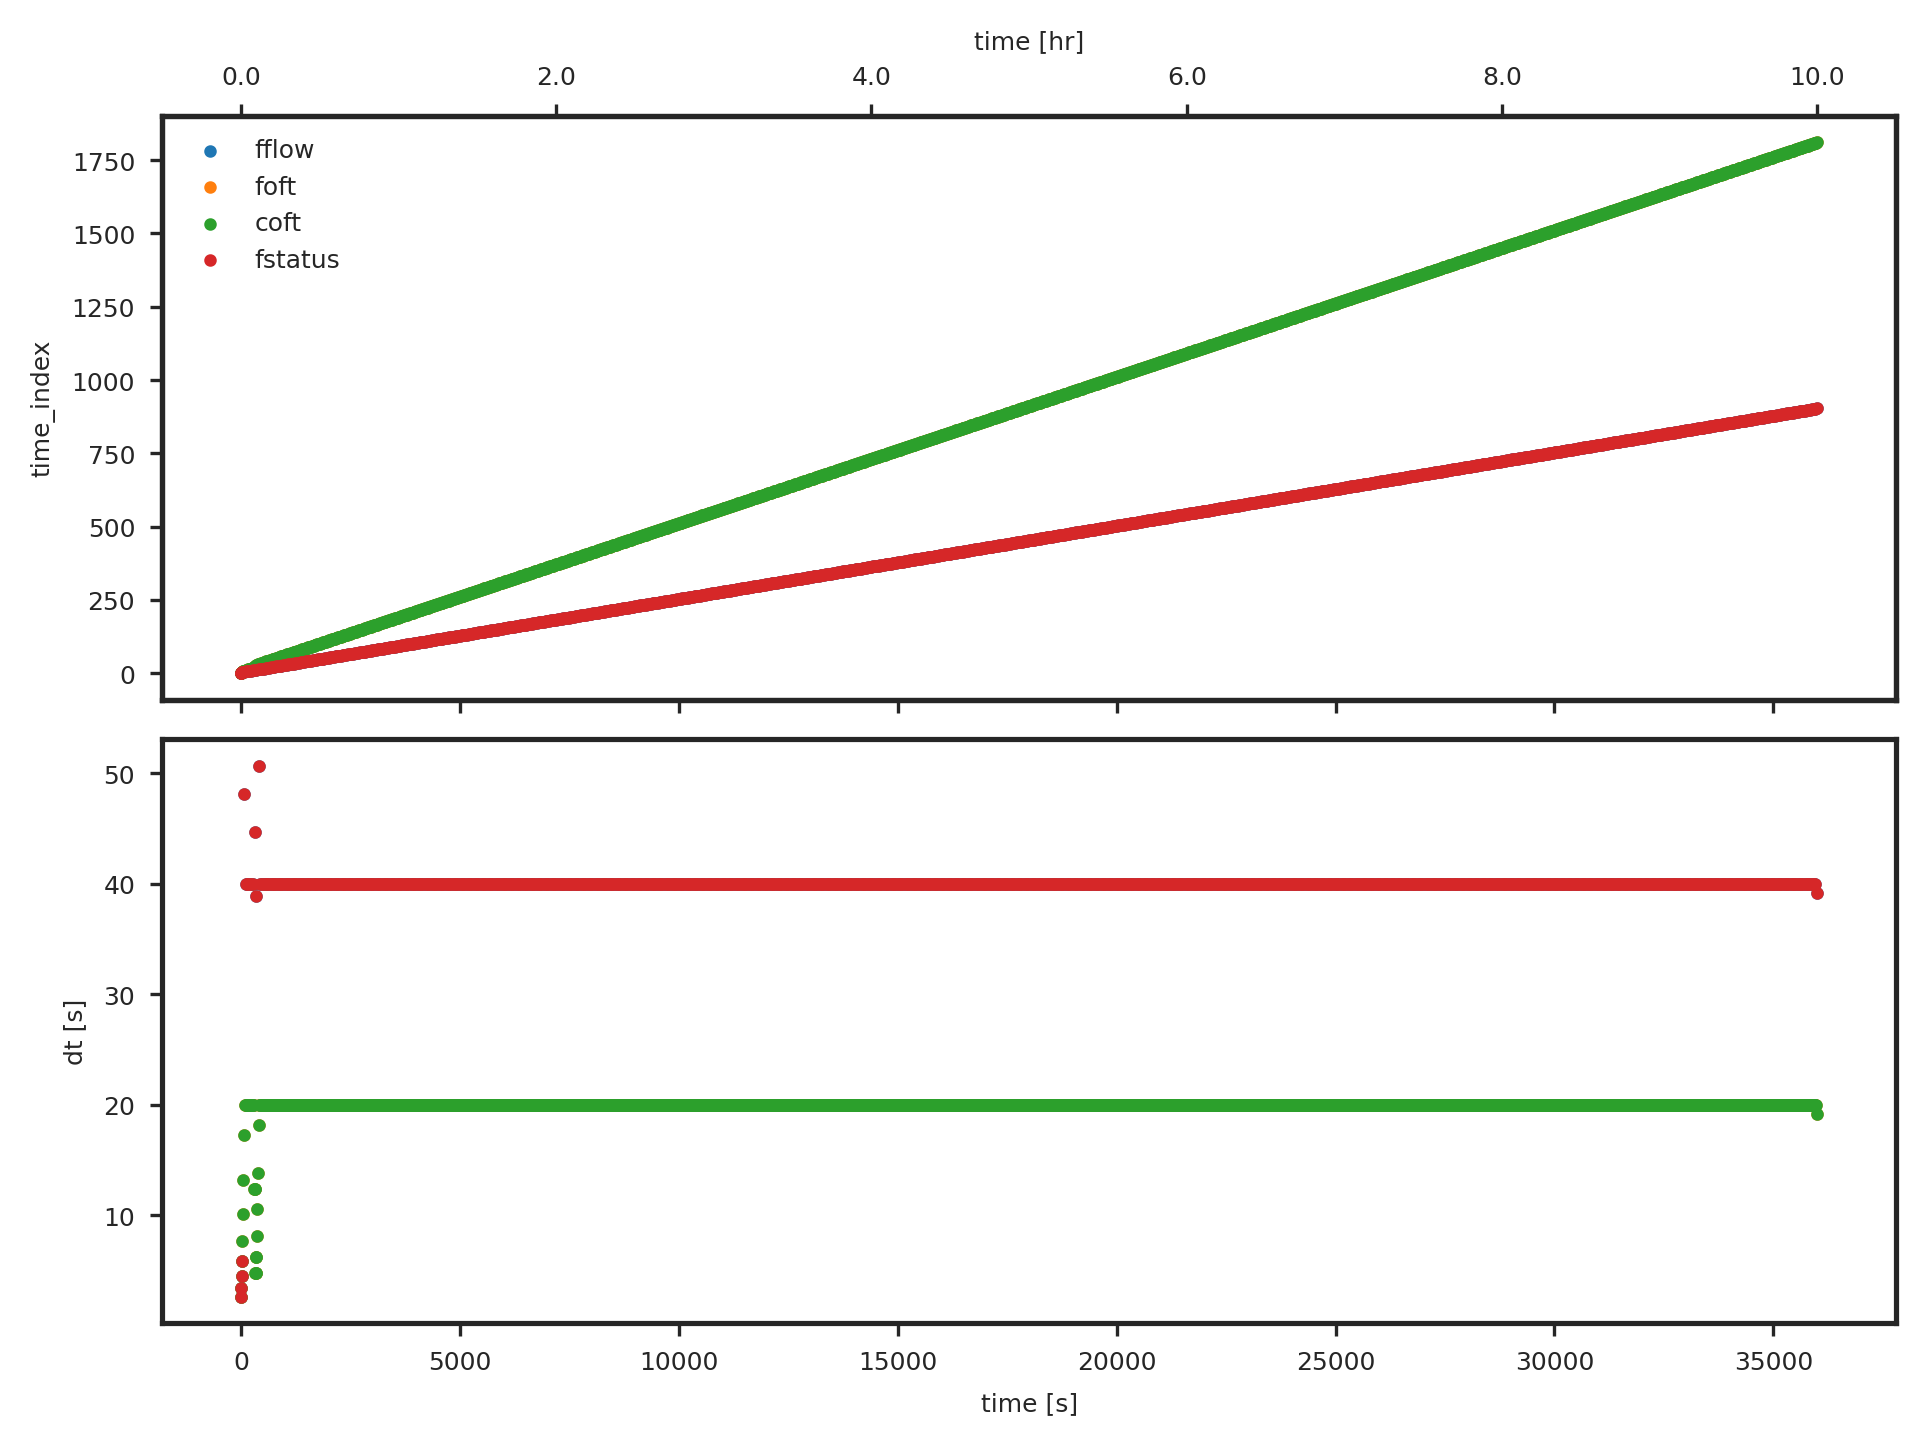

In [6]:
def plot_time_steps(fnames_map):

    fig, (ax, ax2) = plt.subplots(2,1, sharex=True)

    ax2.set_xlabel('time [s]')
    ax.set_ylabel('time_index')
    ax2.set_ylabel('dt [s]')


    for file in fnames_map:
        if file=='fflow':
            var, df = read_FFlow(fnames_map[file], EOS)
            time_steps = df.Time.drop_duplicates()
            dt = time_steps.diff()
            time_index = np.arange(time_steps.shape[0])
            ax.scatter(time_steps, time_index, label=file)
            ax2.scatter(time_steps, dt)
            
        elif file=='fstatus':
            var, df = read_FStatus(fnames_map[file], EOS)
            time_steps = df.Time.drop_duplicates()
            dt = time_steps.diff()

            time_index = np.arange(time_steps.shape[0])
            ax.scatter(time_steps, time_index, label=file)
            ax2.scatter(time_steps, dt)
  

        elif file=='coft':
            var, idx, df = read_COFT(fnames_map[file], EOS)

            dt = df.time.diff()
            ax.scatter(df.time, np.arange(df.time.shape[0]), label=file)
            ax2.scatter(df.time, dt, label=file)


        elif file=='foft':
            var, idx, df = read_FOFT(fnames_map[file], EOS)

            dt = df.time.diff()
            ax.scatter(df.time, np.arange(df.time.shape[0]), label=file)
            ax2.scatter(df.time, dt, label=file)

    secondary_scale(False, ax=ax)

    ax.legend()

    fig.tight_layout()

    return fig, ax


t_f, t_ax = plot_time_steps(fnames_map)
    

In [7]:
EOS

'ECO2N'

In [8]:
ip_file

'case2.inp'

In [9]:
vars, items, df = read_FOFT(fnames_map['foft'], EOS)


Processing FOFT file
   5 grid elements reported in foft.


In [10]:
eleme, conne = read_ipMESH(ip_file)

eleme[]

Processing FOFT file
   5 grid elements reported in foft.
[<matplotlib.lines.Line2D object at 0x7fd22b75cc40>, <matplotlib.collections.PathCollection object at 0x7fd22a4fd5b0>, <matplotlib.collections.PathCollection object at 0x7fd22a4fd550>, <matplotlib.collections.PathCollection object at 0x7fd22a4fdd30>, <matplotlib.collections.PathCollection object at 0x7fd22a4da100>, <matplotlib.collections.PathCollection object at 0x7fd22a4da4f0>, <matplotlib.collections.PathCollection object at 0x7fd22a4da8e0>, <matplotlib.collections.PathCollection object at 0x7fd22a4dacd0>, <matplotlib.collections.PathCollection object at 0x7fd22b767130>, <matplotlib.collections.PathCollection object at 0x7fd22b7675b0>, <matplotlib.collections.PathCollection object at 0x7fd22b767a00>, <matplotlib.collections.PathCollection object at 0x7fd22a4da8b0>, <matplotlib.collections.PathCollection object at 0x7fd22b767cd0>, <matplotlib.collections.PathCollection object at 0x7fd22b767490>, <matplotlib.collections.PathCol

(<Figure size 1920x1440 with 1 Axes>,
 <AxesSubplot:xlabel='T [$\\degree$C]', ylabel='p [bar]'>)

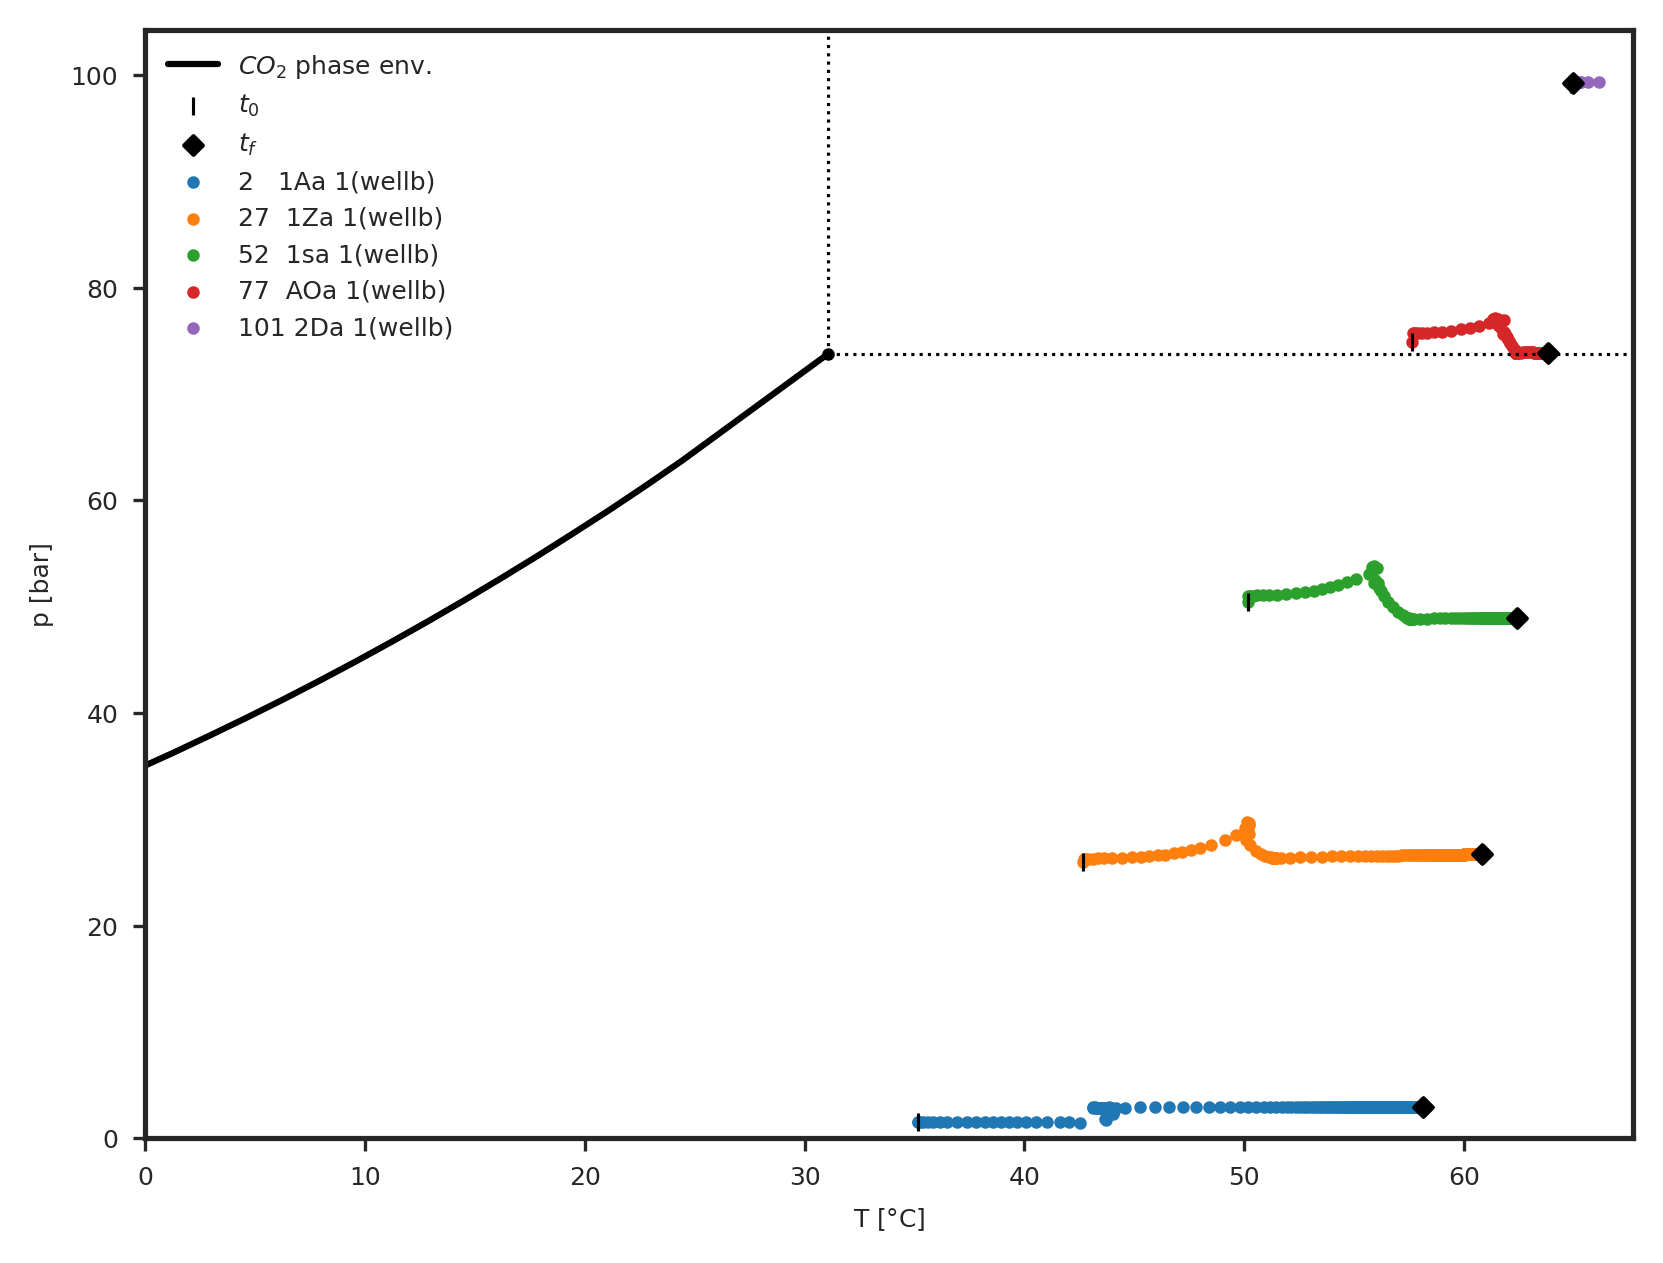

In [74]:

def plot_FOFT_PT(fnames_map, mesh_eleme):
    
    vars, items, df = read_FOFT(fnames_map['foft'], EOS)

    fig, ax = plt.subplots()


    for item in items:
        x_T = df[item, 'T']
        y_P = df[item, 'Pres']

        el = mesh_eleme.loc[item,'ElName']
        mat = mesh_eleme.loc[item,'MAT']
        item_label = '{:<4d}{:s}({:s})'.format(item,el,mat)
        ax.scatter(x_T.iloc[0], y_P.iloc[0], marker='|', s=20, color='k', label = '$t_0$', zorder=100)
        ax.scatter(x_T.iloc[-1], y_P.iloc[-1], marker='D', s=10, color='k', label = '$t_f$', zorder=100)
        
        ax.scatter(x_T, y_P, label = item_label)



    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    t_co2 = np.array([-50,-48.35,-46.69,-45.04,-43.38,-41.73,-40.08,-38.42,-36.77,-35.11,-33.46,-31.81,-30.15,-28.5,-26.84,-25.19,-23.53,-21.88,-20.23,-18.57,-16.92,-15.26,-13.61,-11.96,-10.3,-8.65,-6.99,-5.34,-3.69,-2.03,-0.38,1.28,2.93,4.58,6.24,7.89,9.55,11.2,12.86,14.51,16.16,17.82,19.47,21.13,22.78,24.43,31.05])
    p_co2 = np.array([6.8,7.27,7.77,8.29,8.83,9.4,10,10.63,11.28,11.97,12.68,13.43,14.21,15.02,15.87,16.75,17.66,18.62,19.61,20.64,21.7,22.81,23.96,25.15,26.38,27.66,28.98,30.34,31.76,33.21,34.72,36.28,37.89,39.54,41.25,43.01,44.83,46.7,48.63,50.61,52.65,54.75,56.91,59.12,61.4,63.75,73.76])
    ax.plot(t_co2, p_co2, color='k', lw=1.5, label = r'$CO_2$ phase env.')
    ax.scatter(t_co2.max(), p_co2.max(), c='k')
    ax.hlines(y=p_co2.max(), xmin=t_co2.max(), xmax=xlim[1], ls=':', color='k')
    ax.vlines(x=t_co2.max(), ymin=p_co2.max(), ymax=ylim[1], ls=':', color='k')
    ax.set_ylim(bottom=0, top=ylim[1])
    ax.set_xlim(left=0, right=xlim[1])

    ax.set_ylabel('p [bar]')
    ax.set_xlabel('T [$\degree$C]')

    ax.legend()

    handles, labels = plt.gca().get_legend_handles_labels()
    print(handles)
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys())

    return fig, ax


eleme, conne = read_ipMESH(ip_file)
plot_FOFT_PT(fnames_map, eleme )


In [50]:
df

time      2                                        27          \
                    Pres      Sg XNACL       XCO2liq      T   Pres      Sg   
0                                                                            
1         2.00000  1.504  0.0000   0.0  0.000000e+00  35.15  26.00  0.0000   
2         4.61800  1.518  0.0000   0.0  1.751000e-99  35.18  26.30  0.0000   
3         8.04496  1.517  0.0000   0.0  9.157000e-65  35.26  26.31  0.0000   
4        12.53090  1.514  0.0000   0.0  1.887000e-47  35.40  26.31  0.0000   
5        18.40290  1.512  0.0000   0.0  2.783000e-37  35.60  26.32  0.0000   
...           ...    ...     ...   ...           ...    ...    ...     ...   
1808  35920.80000  2.978  0.9347   0.0  2.103000e-03  58.13  26.74  0.5205   
1809  35940.80000  2.978  0.9347   0.0  2.103000e-03  58.13  26.74  0.5205   
1810  35960.80000  2.978  0.9347   0.0  2.103000e-03  58.13  26.74  0.5205   
1811  35980.80000  2.978  0.9347   0.0  2.103000e-03  58.13  26.74  0.5205   
1812  36000.00000  2.978  0.9347   0.0  2.103000e-03  58.13  26.74  0.5205   

                          ...     77                                     \
     XNACL       XCO2liq  ...   Pres      Sg XNACL       XCO2liq      T   
0                         ...                                             
1      0.0  0.000000e+00  ...  74.93  0.0000   0.0  0.000000e+00  57.65   
2      0.0  5.087000e-75  ...  75.71  0.0000   0.0  3.673000e-26  57.69   
3      0.0  5.502000e-49  ...  75.71  0.0000   0.0  2.057000e-17  57.77   
4      0.0  6.198000e-36  ...  75.72  0.0000   0.0  6.865000e-13  57.91   
5      0.0  3.152000e-28  ...  75.76  0.0000   0.0  4.100000e-10  58.10   
...    ...           ...  ...    ...     ...   ...           ...    ...   
1808   0.0  1.695000e-02  ...  73.91  0.1682   0.0  3.561000e-02  63.81   
1809   0.0  1.695000e-02  ...  73.91  0.1682   0.0  3.561000e-02  63.81   
1810   0.0  1.695000e-02  ...  73.91  0.1682   0.0  3.561000e-02  63.81   
1811   0.0  1.695000e-02  ...  73.91  0.1682   0.0  3.561000e-02  63.81   
1812   0.0  1.695000e-02  ...  73.91  0.1682   0.0  3.561000e-02  63.81   

        101                                  
       Pres       Sg XNACL   XCO2liq      T  
0                                            
1     99.18  0.00000   0.0  0.000013  64.86  
2     99.33  0.00000   0.0  0.008914  65.01  
3     99.33  0.00000   0.0  0.024010  65.31  
4     99.34  0.00000   0.0  0.040690  66.16  
5     99.37  0.04947   0.0  0.040990  65.66  
...     ...      ...   ...       ...    ...  
1808  99.30  0.09686   0.0  0.041220  64.97  
1809  99.30  0.09686   0.0  0.041220  64.97  
1810  99.30  0.09686   0.0  0.041220  64.97  
1811  99.30  0.09686   0.0  0.041220  64.97  
1812  99.30  0.09686   0.0  0.041220  64.97  

[1812 rows x 26 columns]

71.96799999999999

In [16]:
df

time      2                                        27          \
                    Pres      Sg XNACL       XCO2liq      T   Pres      Sg   
0                                                                            
1         2.00000  1.504  0.0000   0.0  0.000000e+00  35.15  26.00  0.0000   
2         4.61800  1.518  0.0000   0.0  1.751000e-99  35.18  26.30  0.0000   
3         8.04496  1.517  0.0000   0.0  9.157000e-65  35.26  26.31  0.0000   
4        12.53090  1.514  0.0000   0.0  1.887000e-47  35.40  26.31  0.0000   
5        18.40290  1.512  0.0000   0.0  2.783000e-37  35.60  26.32  0.0000   
...           ...    ...     ...   ...           ...    ...    ...     ...   
1808  35920.80000  2.978  0.9347   0.0  2.103000e-03  58.13  26.74  0.5205   
1809  35940.80000  2.978  0.9347   0.0  2.103000e-03  58.13  26.74  0.5205   
1810  35960.80000  2.978  0.9347   0.0  2.103000e-03  58.13  26.74  0.5205   
1811  35980.80000  2.978  0.9347   0.0  2.103000e-03  58.13  26.74  0.5205   
1812  36000.00000  2.978  0.9347   0.0  2.103000e-03  58.13  26.74  0.5205   

                          ...     77                                     \
     XNACL       XCO2liq  ...   Pres      Sg XNACL       XCO2liq      T   
0                         ...                                             
1      0.0  0.000000e+00  ...  74.93  0.0000   0.0  0.000000e+00  57.65   
2      0.0  5.087000e-75  ...  75.71  0.0000   0.0  3.673000e-26  57.69   
3      0.0  5.502000e-49  ...  75.71  0.0000   0.0  2.057000e-17  57.77   
4      0.0  6.198000e-36  ...  75.72  0.0000   0.0  6.865000e-13  57.91   
5      0.0  3.152000e-28  ...  75.76  0.0000   0.0  4.100000e-10  58.10   
...    ...           ...  ...    ...     ...   ...           ...    ...   
1808   0.0  1.695000e-02  ...  73.91  0.1682   0.0  3.561000e-02  63.81   
1809   0.0  1.695000e-02  ...  73.91  0.1682   0.0  3.561000e-02  63.81   
1810   0.0  1.695000e-02  ...  73.91  0.1682   0.0  3.561000e-02  63.81   
1811   0.0  1.695000e-02  ...  73.91  0.1682   0.0  3.561000e-02  63.81   
1812   0.0  1.695000e-02  ...  73.91  0.1682   0.0  3.561000e-02  63.81   

        101                                  
       Pres       Sg XNACL   XCO2liq      T  
0                                            
1     99.18  0.00000   0.0  0.000013  64.86  
2     99.33  0.00000   0.0  0.008914  65.01  
3     99.33  0.00000   0.0  0.024010  65.31  
4     99.34  0.00000   0.0  0.040690  66.16  
5     99.37  0.04947   0.0  0.040990  65.66  
...     ...      ...   ...       ...    ...  
1808  99.30  0.09686   0.0  0.041220  64.97  
1809  99.30  0.09686   0.0  0.041220  64.97  
1810  99.30  0.09686   0.0  0.041220  64.97  
1811  99.30  0.09686   0.0  0.041220  64.97  
1812  99.30  0.09686   0.0  0.041220  64.97  

[1812 rows x 26 columns]

time        2                                     22          \
                      Pres        T S_liquid S_gas   XCO2liq Pres       T   
0                                                                           
1    1.000000e-03  4.16326  5.62500      0.0   1.0  0.009710  5.0  30.625   
2    2.309000e-03  4.16470  5.62529      0.0   1.0  0.009713  5.0  30.625   
3    4.022480e-03  4.16901  5.62614      0.0   1.0  0.009723  5.0  30.625   
4    6.265430e-03  4.17880  5.62810      0.0   1.0  0.009745  5.0  30.625   
5    9.201440e-03  4.19860  5.63207      0.0   1.0  0.009789  5.0  30.625   
..            ...      ...      ...      ...   ...       ...  ...     ...   
596  8.576890e+06  4.16326  5.62498      0.0   1.0  0.009710  5.0  30.625   
597  8.592050e+06  4.16326  5.62498      0.0   1.0  0.009710  5.0  30.625   
598  8.604310e+06  4.16326  5.62498      0.0   1.0  0.009710  5.0  30.625   
599  8.620360e+06  4.16326  5.62498      0.0   1.0  0.009710  5.0  30.625   
600  8.640000e+06  4.16326  5.62498      0.0   1.0  0.009710  5.0  30.625   

                    ...   57                                    66          \
    S_liquid S_gas  ... Pres       T S_liquid S_gas   XCO2liq Pres       T   
0                   ...                                                      
1        0.0   1.0  ...  5.0  30.625      0.0   1.0  0.006142  5.0  30.625   
2        0.0   1.0  ...  5.0  30.625      0.0   1.0  0.006142  5.0  30.625   
3        0.0   1.0  ...  5.0  30.625      0.0   1.0  0.006142  5.0  30.625   
4        0.0   1.0  ...  5.0  30.625      0.0   1.0  0.006142  5.0  30.625   
5        0.0   1.0  ...  5.0  30.625      0.0   1.0  0.006142  5.0  30.625   
..       ...   ...  ...  ...     ...      ...   ...       ...  ...     ...   
596      0.0   1.0  ...  5.0  30.625      0.0   1.0  0.006142  5.0  30.625   
597      0.0   1.0  ...  5.0  30.625      0.0   1.0  0.006142  5.0  30.625   
598      0.0   1.0  ...  5.0  30.625      0.0   1.0  0.006142  5.0  30.625   
599      0.0   1.0  ...  5.0  30.625      0.0   1.0  0.006142  5.0  30.625   
600      0.0   1.0  ...  5.0  30.625      0.0   1.0  0.006142  5.0  30.625   

                              
    S_liquid S_gas   XCO2liq  
0                             
1        0.0   1.0  0.006142  
2        0.0   1.0  0.006142  
3        0.0   1.0  0.006142  
4        0.0   1.0  0.006142  
5        0.0   1.0  0.006142  
..       ...   ...       ...  
596      0.0   1.0  0.006142  
597      0.0   1.0  0.006142  
598      0.0   1.0  0.006142  
599      0.0   1.0  0.006142  
600      0.0   1.0  0.006142  

[600 rows x 41 columns]

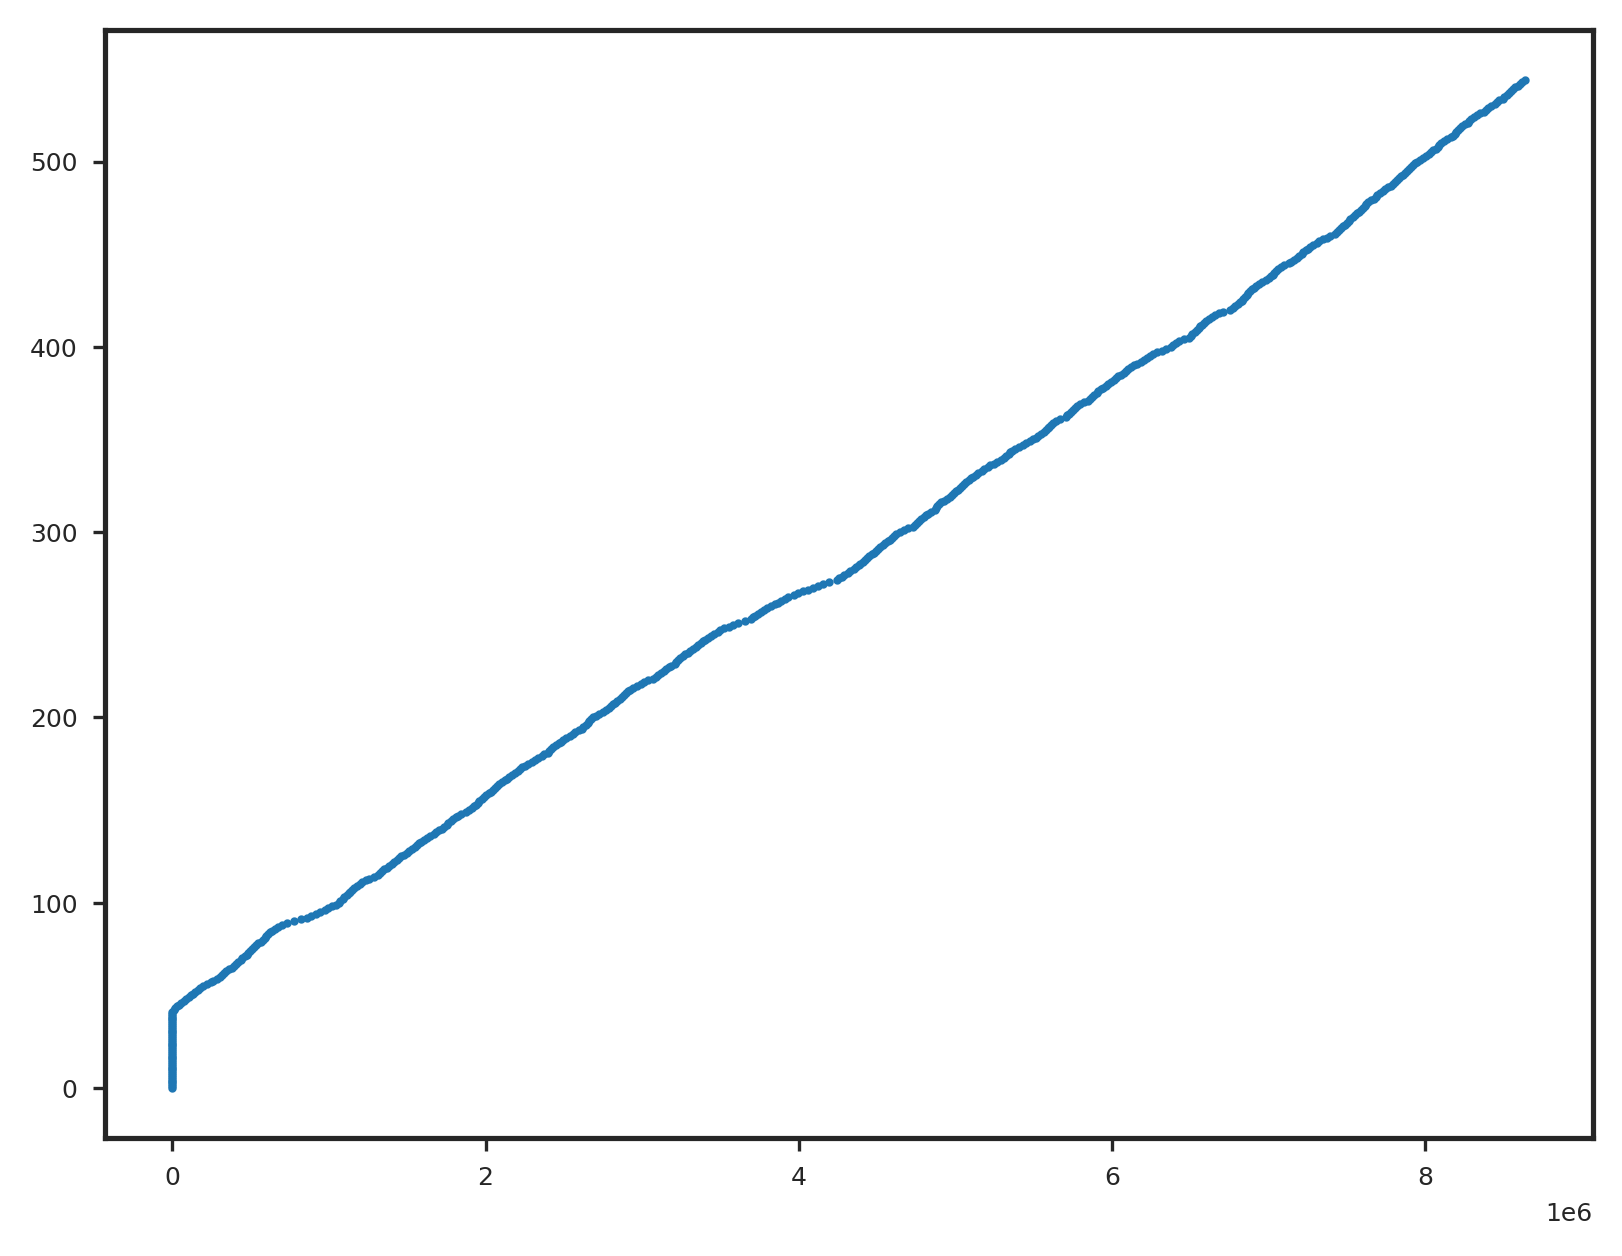

In [4]:
ip_file = fnames_map['fstatus']


var, df = read_FStatus(ip_file, EOS)


fig, ax = plt.subplots()

time_steps = df.Time.drop_duplicates()
time_index = np.arange(time_steps.shape[0])

ax.scatter(time_steps, time_index, s=1)

In [54]:
os.chdir(old_path)
path = '/scratch/SCS/gpb/T2WELL/T2Well_post/sample_files/sample_T2Well_ECO2N/'
# path = '/scratch/SCS/gpb/T2WELL/ECO2M_case/'
os.chdir(path)

raw_names = tuple([r'fflow', r'fstatus', r'coft', r'foft'])
fnames = []
plot_bool = dict()
fnames_map=dict()

for f in os.listdir():
    if f.lower().startswith(raw_names):
        f_size = os.path.getsize(f)
        if f_size>0:
            fnames.append(f)
            flabel = f.lower().split('_')[0]
            fnames_map[flabel]=f
            plot_bool[flabel] = True

    elif f.endswith(tuple(['.in', '.inp'])):
        ip_file = f

    elif f.endswith('out'):
        op_file = f


EOS = get_EOS(op_file)
print('Input file: {:s}'.format(ip_file))
print('EOS version: {:s}'.format(EOS))


eleme, conne = read_ipMESH(ip_file)


ip_file = fnames_map['fstatus']


var, df = read_FStatus(ip_file, EOS)

print(var)

df


Input file: case2.inp
EOS version: ECO2N
Processing FStatus file
['Sg', 'XCO2liq', 'Pres', 'T', 'Dgas']


,Time,Depth,Sg,XCO2liq,Pres,T,Dgas
0,2.0,0.0,1.000000,0.000000,1.013253,35.000000,1.749137
1,2.0,5.0,0.000000,0.000000,1.503520,35.150104,2.613717
2,2.0,15.0,0.000000,0.000000,2.483998,35.450310,4.340039
3,2.0,25.0,0.000000,0.000000,3.464402,35.750516,6.062570
4,2.0,35.0,0.000000,0.000000,4.444747,36.050721,7.781334
...,...,...,...,...,...,...,...
92203,36000.0,965.0,0.102682,0.040696,96.316619,64.840617,248.821059
92204,36000.0,975.0,0.100437,0.040896,97.407013,64.887878,253.919093
92205,36000.0,985.0,0.098312,0.041087,98.499009,64.934193,259.010556
92206,36000.0,995.0,0.096862,0.041219,99.301324,64.973685,262.716843


In [38]:
df

,Time,Depth,Sg,XCO2liq,Pres,T,Dgas
0,2.0,0.0,1.000000,0.000000,1.013253,35.000000,1.749137
1,2.0,5.0,0.000000,0.000000,1.503520,35.150104,2.613717
2,2.0,15.0,0.000000,0.000000,2.483998,35.450310,4.340039
3,2.0,25.0,0.000000,0.000000,3.464402,35.750516,6.062570
4,2.0,35.0,0.000000,0.000000,4.444747,36.050721,7.781334
...,...,...,...,...,...,...,...
92203,36000.0,965.0,0.102682,0.040696,96.316619,64.840617,248.821059
92204,36000.0,975.0,0.100437,0.040896,97.407013,64.887878,253.919093
92205,36000.0,985.0,0.098312,0.041087,98.499009,64.934193,259.010556
92206,36000.0,995.0,0.096862,0.041219,99.301324,64.973685,262.716843


In [ ]:

foft_var, foft_idx, foft = read_FOFT(fnames_map['foft'], EOS)

foft

Processing FOFT_test_55bar10C file
   6 grid elements reported in foft.


time       33                                             32  \
                      Pres        T S_liquid S_gas       XCO2liq     Pres   
0                                                                           
1         0.50000  138.497  41.1637      0.0   0.0  0.000000e+00  138.314   
2         1.00000  138.497  41.1824      0.0   0.0  0.000000e+00  138.445   
3         1.65450  138.497  41.1713      0.0   0.0  5.164930e-53  138.454   
4         2.51124  138.497  41.1340      0.0   0.0  9.518400e-43  138.451   
5         3.63271  138.497  41.0587      0.0   0.0  2.181950e-34  138.451   
..            ...      ...      ...      ...   ...           ...      ...   
740  214933.00000  138.497  39.2648      0.0   0.0  6.995080e-03  138.446   
741  217366.00000  138.497  39.2645      0.0   0.0  6.995070e-03  138.446   
742  220551.00000  138.497  39.2640      0.0   0.0  6.995070e-03  138.446   
743  224721.00000  138.497  39.2633      0.0   0.0  6.995060e-03  138.446   
744  230000.00000  138.497  39.2624      0.0   0.0  6.995060e-03  138.446   

                             ...        2                            \
           T S_liquid S_gas  ...     Pres         T  S_liquid S_gas   
0                            ...                                      
1    41.1634      0.0   0.0  ...  33.3853   9.69002  0.000000   0.0   
2    41.2205      0.0   0.0  ...  55.2428  12.85490  0.000000   0.0   
3    37.6976      0.0   0.0  ...  55.5221  14.82770  0.009774   0.0   
4    36.2294      0.0   0.0  ...  55.4742  14.62690  0.074833   0.0   
5    35.8897      0.0   0.0  ...  55.4173  14.25390  0.190497   0.0   
..       ...      ...   ...  ...      ...       ...       ...   ...   
740  41.1234      0.0   0.0  ...  55.4390   9.69052  0.999965   0.0   
741  41.1285      0.0   0.0  ...  55.4390   9.69048  0.999965   0.0   
742  41.1340      0.0   0.0  ...  55.4390   9.69044  0.999965   0.0   
743  41.1397      0.0   0.0  ...  55.4390   9.69039  0.999965   0.0   
744  41.1450      0.0   0.0  ...  55.4390   9.69034  0.999965   0.0   

                      1                                 
          XCO2liq  Pres     T S_liquid S_gas   XCO2liq  
0                                                       
1    4.001950e-07  55.0  10.0      1.0   0.0  0.070459  
2    2.679820e-02  55.0  10.0      1.0   0.0  0.070459  
3    5.203110e-02  55.0  10.0      1.0   0.0  0.070459  
4    5.215920e-02  55.0  10.0      1.0   0.0  0.070459  
5    5.240360e-02  55.0  10.0      1.0   0.0  0.070459  
..            ...   ...   ...      ...   ...       ...  
740  1.588240e-02  55.0  10.0      1.0   0.0  0.070459  
741  1.588240e-02  55.0  10.0      1.0   0.0  0.070459  
742  1.588240e-02  55.0  10.0      1.0   0.0  0.070459  
743  1.588240e-02  55.0  10.0      1.0   0.0  0.070459  
744  1.588240e-02  55.0  10.0      1.0   0.0  0.070459  

[744 rows x 31 columns]

In [ ]:
eleme

,ElName,NSEQ,NADD,MAT,VOLX,AHTX,PMX,X,Y,Z
1,* B56,,,WRCHK,3.801330e+53,0.0,1.0,0.05500,-312.500,-312.500
2,B21,,,WROCK,7.602654e-01,0.0,1.0,0.05500,-323.000,-323.000
3,A86,,,WROCK,7.602654e-01,0.0,1.0,0.05500,-343.000,-343.000
4,A51,,,WROCK,7.602654e-01,0.0,1.0,0.05500,-363.000,-363.000
5,A16,,,WROCK,7.602654e-01,0.0,1.0,0.05500,-383.000,-383.000
...,...,...,...,...,...,...,...,...,...,...
132,1 1,,,CAPRK,3.333260e+54,0.0,1.0,1283.08975,-1217.125,-1217.125
133,1 2,,,CAPRK,4.163060e+54,0.0,1.0,1456.74733,-1217.125,-1217.125
134,1 3,,,CAPRK,5.180190e+54,0.0,1.0,1647.78144,-1217.125,-1217.125
135,1 4,,,CAPRK,6.389360e+54,0.0,1.0,1857.34961,-1217.125,-1217.125


0 Pres
plot item 33 in Pres plot
item is 33
   36
plot item 32 in Pres plot
item is 32
   71
plot item 21 in Pres plot
item is 21
  456
plot item 11 in Pres plot
item is 11
  8 6
plot item 2 in Pres plot
item is 2
  B21
plot item 1 in Pres plot
item is 1
* B56
1 T
plot item 33 in T plot
item is 33
   36
plot item 32 in T plot
item is 32
   71
plot item 21 in T plot
item is 21
  456
plot item 11 in T plot
item is 11
  8 6
plot item 2 in T plot
item is 2
  B21
plot item 1 in T plot
item is 1
* B56
2 S_liquid
plot item 33 in S_liquid plot
item is 33
   36
plot item 32 in S_liquid plot
item is 32
   71
plot item 21 in S_liquid plot
item is 21
  456
plot item 11 in S_liquid plot
item is 11
  8 6
plot item 2 in S_liquid plot
item is 2
  B21
plot item 1 in S_liquid plot
item is 1
* B56
3 S_gas
plot item 33 in S_gas plot
item is 33
   36
plot item 32 in S_gas plot
item is 32
   71
plot item 21 in S_gas plot
item is 21
  456
plot item 11 in S_gas plot
item is 11
  8 6
plot item 2 in S_gas plot


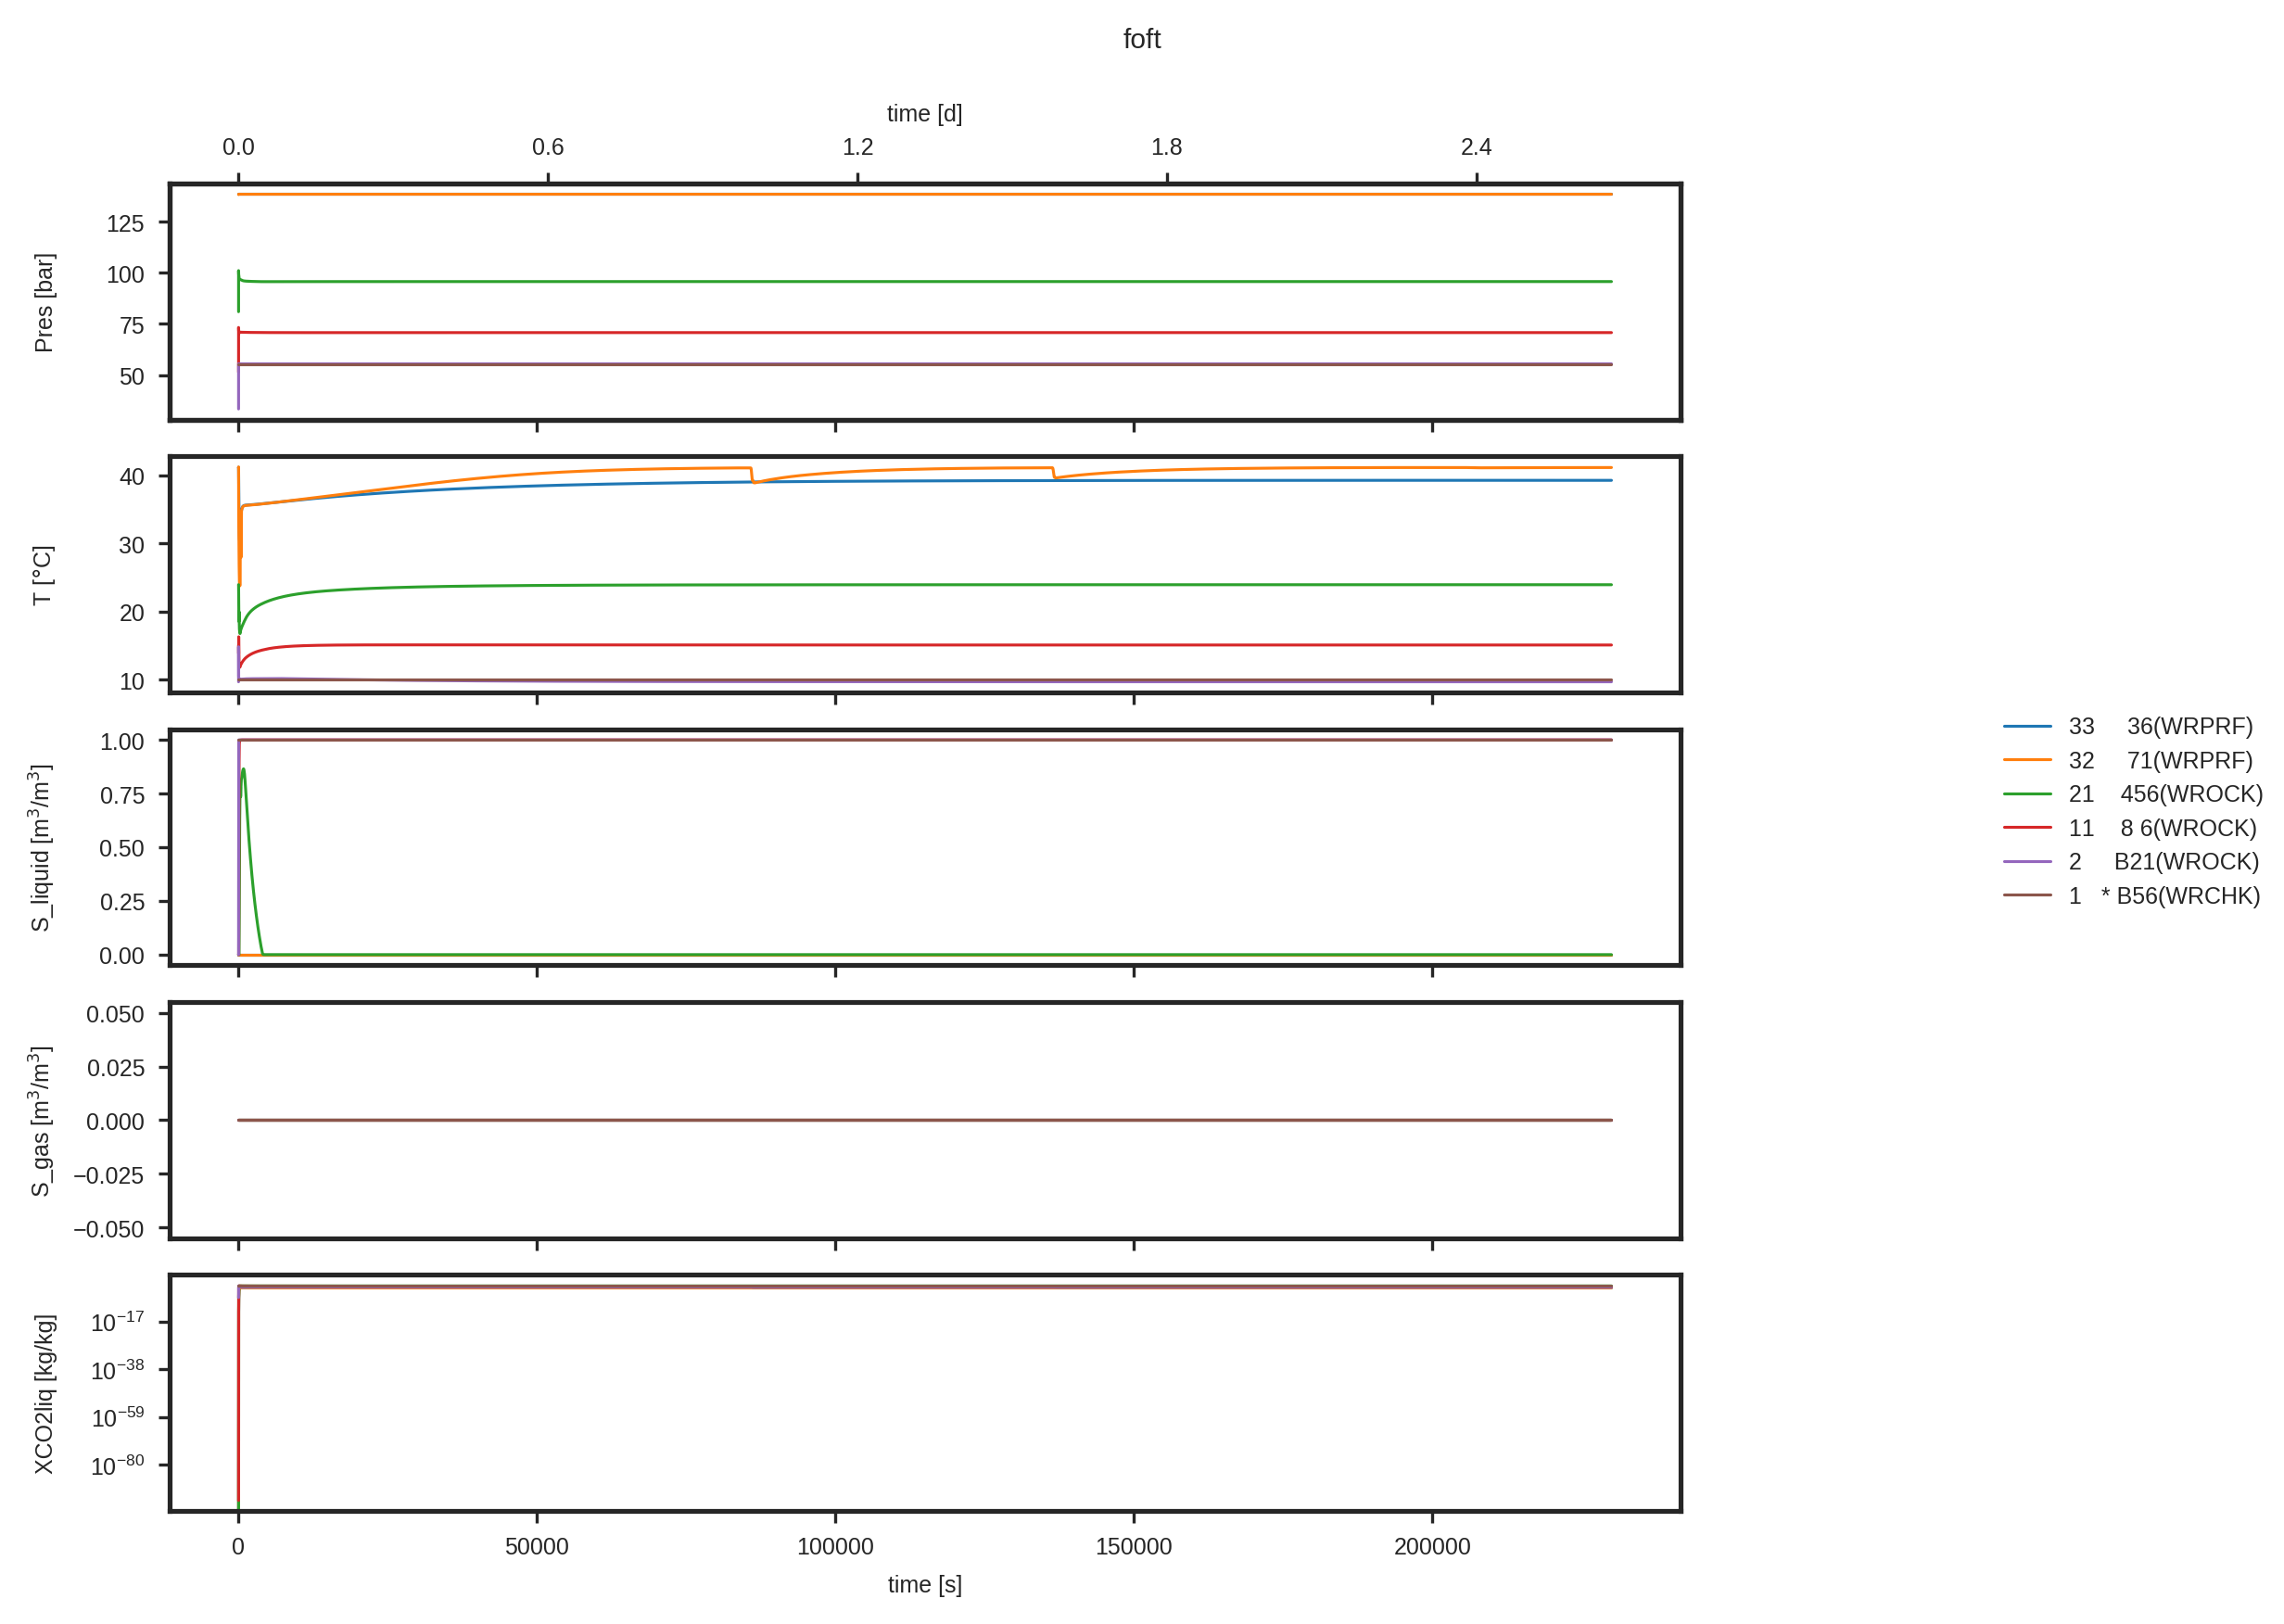

In [ ]:


def plot_OFT(title, df, items, df_vars, logscale, mesh_eleme, mesh_conne):
    w = 6
    h = (2.8-1)*len(df_vars)
    
    w = 8.1
    h = 5.85
    rcParams['figure.figsize'] = [w,h]

    mesh_eleme_v2 = mesh_eleme.copy()
    mesh_eleme_v2 = mesh_eleme_v2.set_index(('ElName'))


    fig, axs = plt.subplots(len(df_vars),1, sharex=True)

    for var_idx, var in enumerate(df_vars):

        print(var_idx, var)


        if len(df_vars)>1:
            ax = axs[var_idx]
        else:
            ax = axs

        for item in items:
            print('plot item {:d} in {:s} plot'.format(item,var))

            if title =='coft':
   
                el1 = mesh_conne.loc[item, 'EL1']
                el2 = mesh_conne.loc[item, 'EL2']
                k_dir = mesh_conne.loc[item, 'ISOT']

                mat1 = mesh_eleme_v2.loc[el1,'MAT']
                mat2 = mesh_eleme_v2.loc[el2,'MAT']
                item_label =  '{:s}>{:s}({:s} to {:s} in {:s} dir.)'.format(el1,el2,mat1, mat2, perm_dict[k_dir])



            elif title =='foft':
                print('item is',item)
                el = mesh_eleme.loc[item,'ElName']
                print(el)
                mat = mesh_eleme.loc[item,'MAT']
                item_label = '{:<4d}{:s}({:s})'.format(item,el,mat)
            df.plot(x='time', y=(item, var), ax=ax, label=item_label, legend = False)
            # df.plot(x='time', y=(item, var), ax=ax, label='tt', legend = False)

        ##TEST
        #ax.set_xlim(left=-1, right=30*60)
        ##TEST

        if var == df_vars[-1]:
            ax.set_xlabel('time [s]')

        if var == df_vars[0]:
            secondary_scale(logscale, ax)
        

        
        
        ax.set_ylabel('{:s} [{:s}]'.format(var, units_dict[var]))
        
    if title == 'foft':
        ax.set_yscale('log')

    fig.suptitle(title)
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='center right')
    fig.align_ylabels()
    fig.tight_layout(rect=[0,0,0.75,0.98])

plot_OFT('foft', foft, foft_idx, foft_var, logscale=False, mesh_eleme=eleme, mesh_conne=conne)

In [ ]:
eleme

,ElName,NSEQ,NADD,MAT,VOLX,AHTX,PMX,X,Y,Z
1,* B56,,,WRCHK,3.801330e+53,0.0,1.0,0.05500,-312.500,-312.500
2,B21,,,WROCK,7.602654e-01,0.0,1.0,0.05500,-323.000,-323.000
3,A86,,,WROCK,7.602654e-01,0.0,1.0,0.05500,-343.000,-343.000
4,A51,,,WROCK,7.602654e-01,0.0,1.0,0.05500,-363.000,-363.000
5,A16,,,WROCK,7.602654e-01,0.0,1.0,0.05500,-383.000,-383.000
...,...,...,...,...,...,...,...,...,...,...
132,1 1,,,CAPRK,3.333260e+54,0.0,1.0,1283.08975,-1217.125,-1217.125
133,1 2,,,CAPRK,4.163060e+54,0.0,1.0,1456.74733,-1217.125,-1217.125
134,1 3,,,CAPRK,5.180190e+54,0.0,1.0,1647.78144,-1217.125,-1217.125
135,1 4,,,CAPRK,6.389360e+54,0.0,1.0,1857.34961,-1217.125,-1217.125


In [ ]:
fnames_map

{'coft': 'COFT_test_55bar10C',
 'fstatus': 'fstatus_test_55bar10C_ 1',
 'fflow': 'fflow_test_55bar10C_ 1',
 'foft': 'FOFT_test_55bar10C'}

In [ ]:
ip_file = fnames_map['fflow']


var, df = read_FFlow(ip_file, EOS)

var

Processing fflow_test_55bar10C_ 1 file


['Dis',
 'cumDepth',
 'q_aqueous',
 'q_liquid',
 'q_gas',
 'V_aqueous',
 'V_liquid',
 'V_gas',
 'V_mix']

In [13]:
coft

,1,2,3,4,5,6,7,8,9,10,11
0,,,,,,,,,,,
1,1.000000e-03,1,0.0,0.0,0.000000,0.000000,68,0.0,0.0,-4.574704e-15,-4.574704e-15
2,2.309000e-03,1,0.0,0.0,0.000033,0.000033,68,0.0,0.0,-1.372411e-14,-1.372411e-14
3,4.022481e-03,1,0.0,0.0,0.000077,0.000077,68,0.0,0.0,-2.287352e-14,-2.287352e-14
4,6.265428e-03,1,0.0,0.0,0.000134,0.000134,68,0.0,0.0,-3.659763e-14,-3.659763e-14
5,9.201445e-03,1,0.0,0.0,0.000209,0.000209,68,0.0,0.0,-5.032175e-14,-5.032175e-14
...,...,...,...,...,...,...,...,...,...,...,...
95,5.593914e+06,1,0.0,0.0,1.000000,1.000000,68,0.0,0.0,9.999973e-01,9.999973e-01
96,6.593914e+06,1,0.0,0.0,1.000000,1.000000,68,0.0,0.0,9.999978e-01,9.999978e-01
97,7.593914e+06,1,0.0,0.0,1.000000,1.000000,68,0.0,0.0,9.999981e-01,9.999981e-01


In [6]:
fnames_map['fstatus']

'fstatus_Injection_1km_5bar_1kg_ 1'

In [8]:
ip_file = r'fstatus_Injection_1km_5bar_1kg_ 1'

with open(ip_file) as fs:
    next(fs)
    fs_header = next(fs)

fs_header = fs_header.split('=')[1]
fs_header = fs_header.split(",")
fs_header

fstatus = pd.read_csv(ip_file, skiprows=3, names=fs_header)
fstatus = fstatus.apply(pd.to_numeric, errors='coerce')
fstatus = fstatus.fillna(0)

fstatus

,WellID,Time(s),Dis(m),cumDepth(m),S_aqueous,S_liquid,S_gas,XCO2liq(kg/kg),Pres(Pa),T(<sup<o</sup>C),D_aqueous(kg/m<sup>3</sup>),D_liquid(kg/m<sup>3</sup>),D_gas(kg/m<sup>3</sup>)\n
0,1,0.001,0.0,0.0,0.0,0.0,1.0,0.0,2.500000e+06,5.000000,1000.796030,895.021800,58.152394
1,1,0.001,25.0,-25.0,0.0,0.0,1.0,0.0,4.163259e+05,5.625000,1000.100953,890.867240,8.128557
2,1,0.001,75.0,-100.0,0.0,0.0,1.0,0.0,4.203215e+05,6.875000,1000.070908,882.424495,8.169152
3,1,0.001,125.0,-150.0,0.0,0.0,1.0,0.0,4.243370e+05,8.125000,1000.016427,873.737205,8.209707
4,1,0.001,175.0,-200.0,0.0,0.0,1.0,0.0,4.283724e+05,9.375000,999.938452,864.768155,8.250268
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,1,8640000.000,825.0,-850.0,0.0,0.0,1.0,0.0,8.175748e+05,22.373951,998.043830,746.040436,15.320247
1448,1,8640000.000,875.0,-900.0,0.0,0.0,1.0,0.0,8.250144e+05,23.739750,997.722149,728.715675,15.384157
1449,1,8640000.000,925.0,-950.0,0.0,0.0,1.0,0.0,8.324861e+05,25.082583,997.387726,709.960078,15.449203
1450,1,8640000.000,975.0,-1000.0,0.0,0.0,1.0,0.0,8.399988e+05,26.376278,997.049050,689.372108,15.517313


In [ ]:
read_FStatus(ip_file)

In [11]:
def read_FStatus(ip_file):

    """
    Function to parse FStatus file.
    It creates a pandas dataframe
    """
    print('Processing {:s} file'.format(ip_file))

    with open(ip_file) as fs:
        next(fs)
        fs_header = next(fs)
    
    fs_header = fs_header.split('=')[1]
    fs_header = fs_header.split()

    fstatus = pd.read_csv(ip_file, skiprows=3, names=fs_header)
    fstatus = fstatus.apply(pd.to_numeric, errors='coerce')
    fstatus = fstatus.fillna(0)
    fstatus['Pres']/= 1e5


    return fs_header[2:], fstatus

In [7]:
read

,ElName,NSEQ,NADD,MAT,VOLX,AHTX,PMX,X,Y,Z
1,*bA 1,,,wella,1.000000e+52,NaN,NaN,0.000,0.0,0.0
2,1AA 1,,,wellb,1.909300e+00,0.0,0.0,0.000,0.0,-25.0
3,1BA 1,,,wellb,1.909300e+00,0.0,0.0,0.000,0.0,-75.0
4,1CA 1,,,wellb,1.909300e+00,0.0,0.0,0.000,0.0,-125.0
5,1DA 1,,,wellb,1.909300e+00,0.0,0.0,0.000,0.0,-175.0
...,...,...,...,...,...,...,...,...,...,...
65,02A92,,,sand1,1.284300e+07,0.0,0.0,475.387,0.0,-1025.0
66,02A93,,,sand1,1.847900e+07,0.0,0.0,569.983,0.0,-1025.0
67,02A94,,,sand1,2.659100e+07,0.0,0.0,683.498,0.0,-1025.0
68,02A95,,,sand1,3.826800e+07,0.0,0.0,819.716,0.0,-1025.0


In [3]:
test = ['plot_T2output.py', 'sample_files/sample_T2Well_ECO2M/Injection_1km_5bar_1kg.inp', 'fstatus']
plot_specs(test, plot_bool, fnames)

file queried: ['fstatus']
items queried: None
asdasd ['fflow_Injection_1km_5bar_1kg_ 1', 'fstatus_Injection_1km_5bar_1kg_ 1', 'COFT_Injection_1km_5bar_1kg', 'FOFT_Injection_1km_5bar_1kg']


({'fflow_Injection_1km_5bar_1kg_ 1': False,
  'fstatus_Injection_1km_5bar_1kg_ 1': False,
  'COFT_Injection_1km_5bar_1kg': False,
  'FOFT_Injection_1km_5bar_1kg': False},
 {})

In [10]:
plot_bool.keys()

dict_keys(['fflow_Injection_1km_5bar_1kg_ 1', 'fstatus_Injection_1km_5bar_1kg_ 1', 'COFT_Injection_1km_5bar_1kg', 'FOFT_Injection_1km_5bar_1kg'])

In [6]:
any(item.startswith('fstatus') for item in fnames)

True

In [ ]:
path = 'sample_files/sample_T2Well_ECO2M/'
os.chdir(path)





os.chdir(old_path)

In [2]:



ip_file = 'case2.inp'

raw_names = [r'FFlow', r'FStatus', r'COFT', r'FOFT']
fnames = []
op_files = []
plot_bool = dict()

for f in os.listdir(os.getcwd()):
    if f in raw_names:
        f_size = os.path.getsize(f)
        if f_size>0:
            fnames.append(f)
            op_files.append(f)
            plot_bool[f] = True


ffunc = []


parse_dict = dict()

for file in fnames:
    if file=='FFlow':
        parse_dict[file]=read_FFlow
    elif file=='FStatus':
        parse_dict[file]=read_FStatus
    elif file=='COFT':
        parse_dict[file]=read_COFT
    elif file=='FOFT':
        parse_dict[file]=read_FOFT

plot_dict = dict()



In [5]:
os.chdir('/')


PATH_ECO2N = r'/workspaces/T2Well_post/sample_files/sample_T2Well_ECO2N'
PATH_ECO2M = r'/workspaces/T2Well_post/sample_files/sample_T2Well_ECO2M'


In [6]:
os.listdir(PATH_ECO2M)

['fflow_Injection_1km_5bar_1kg_ 1',
 'INCON',
 'SAVE',
 'LINEQ',
 'fstatus_Injection_1km_5bar_1kg_ 1',
 'xyzrock.mesh',
 'WHConds_Injection_1km_5bar_1kg.txt',
 'COFT_Injection_1km_5bar_1kg',
 'CO2TAB',
 'Inj.out',
 'VERS',
 'TABLE',
 'Injection_1km_5bar_1kg.inp',
 'FOFT_Injection_1km_5bar_1kg',
 'MESH',
 'DOFT',
 'GENER']

In [12]:
raw_names = tuple([r'fflow', r'fstatus', r'coft', r'foft'])

plot_bool = dict()

for f in os.listdir(PATH_ECO2M):
    if f.lower().startswith(raw_names):
        plot_bool[f] = True

plot_bool

{'fflow_Injection_1km_5bar_1kg_ 1': True,
 'fstatus_Injection_1km_5bar_1kg_ 1': True,
 'COFT_Injection_1km_5bar_1kg': True,
 'FOFT_Injection_1km_5bar_1kg': True}

Bad pipe message: %s [b'\x8b\x13A:\x85\xdct\x91\x81\xe2\xea\xad\x15\xaf\x90`q\xc1 \xd9C\xd3\x17\xf9\xd0\xf7\xb4\xa4\x94g[', b'\xa6\xa8-\xc2\xe31\x13\xdc,\x01\xf6\xb1"\x916\xd00s\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.', b'0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03']
Bad pipe message: %s [b'\x06\x03\x08\x07', b'\x08\t\x08\n\x08\x0b\x08']
Bad pipe message: %s [b'\x05\x08\x06']
Bad pipe message: %s [b'\x05\x01\x06', b'']
Bad pipe message: %s [b'\x03\x02\x03\x04\x00-\x00\x02\x01\x01\x003\x00&\x00$\x00\x1d\x00 \x8dq\xb1\xa5\n\xd0.\xd5[W\x1d\x03:j^\x86\x91\xf0\xfe\xe7j\x87']
Bad pipe message: %s [b"y;\xdc905\xe2\x05\xc1P\xd6\xe7\xc5\x16P\x8a'\xa2\x00\x00|\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2\xc0\x9e\

In [13]:
os.getcwd()

'/'

In [14]:
os.listdir(PATH_ECO2N)

['case2.out',
 'INCON',
 'COFT',
 'SAVE',
 'LINEQ',
 'CO2TAB',
 'Thumbs.db',
 'FOFT',
 'VERS',
 'TABLE',
 'MESH',
 'DOFT',
 'FFlow',
 'GENER',
 'FStatus',
 'case2.inp']

In [15]:
os.chdir(PATH_ECO2N)

In [19]:
os.listdir(os.path.dirname('case2.inp'))



FileNotFoundError: [Errno 2] No such file or directory: ''

In [6]:
fstatus_var, fstatus_df = read_FStatus('FStatus')
fflow_var, fflow_df = read_FFlow('FFlow')



Processing FStatus file
Processing FFlow file


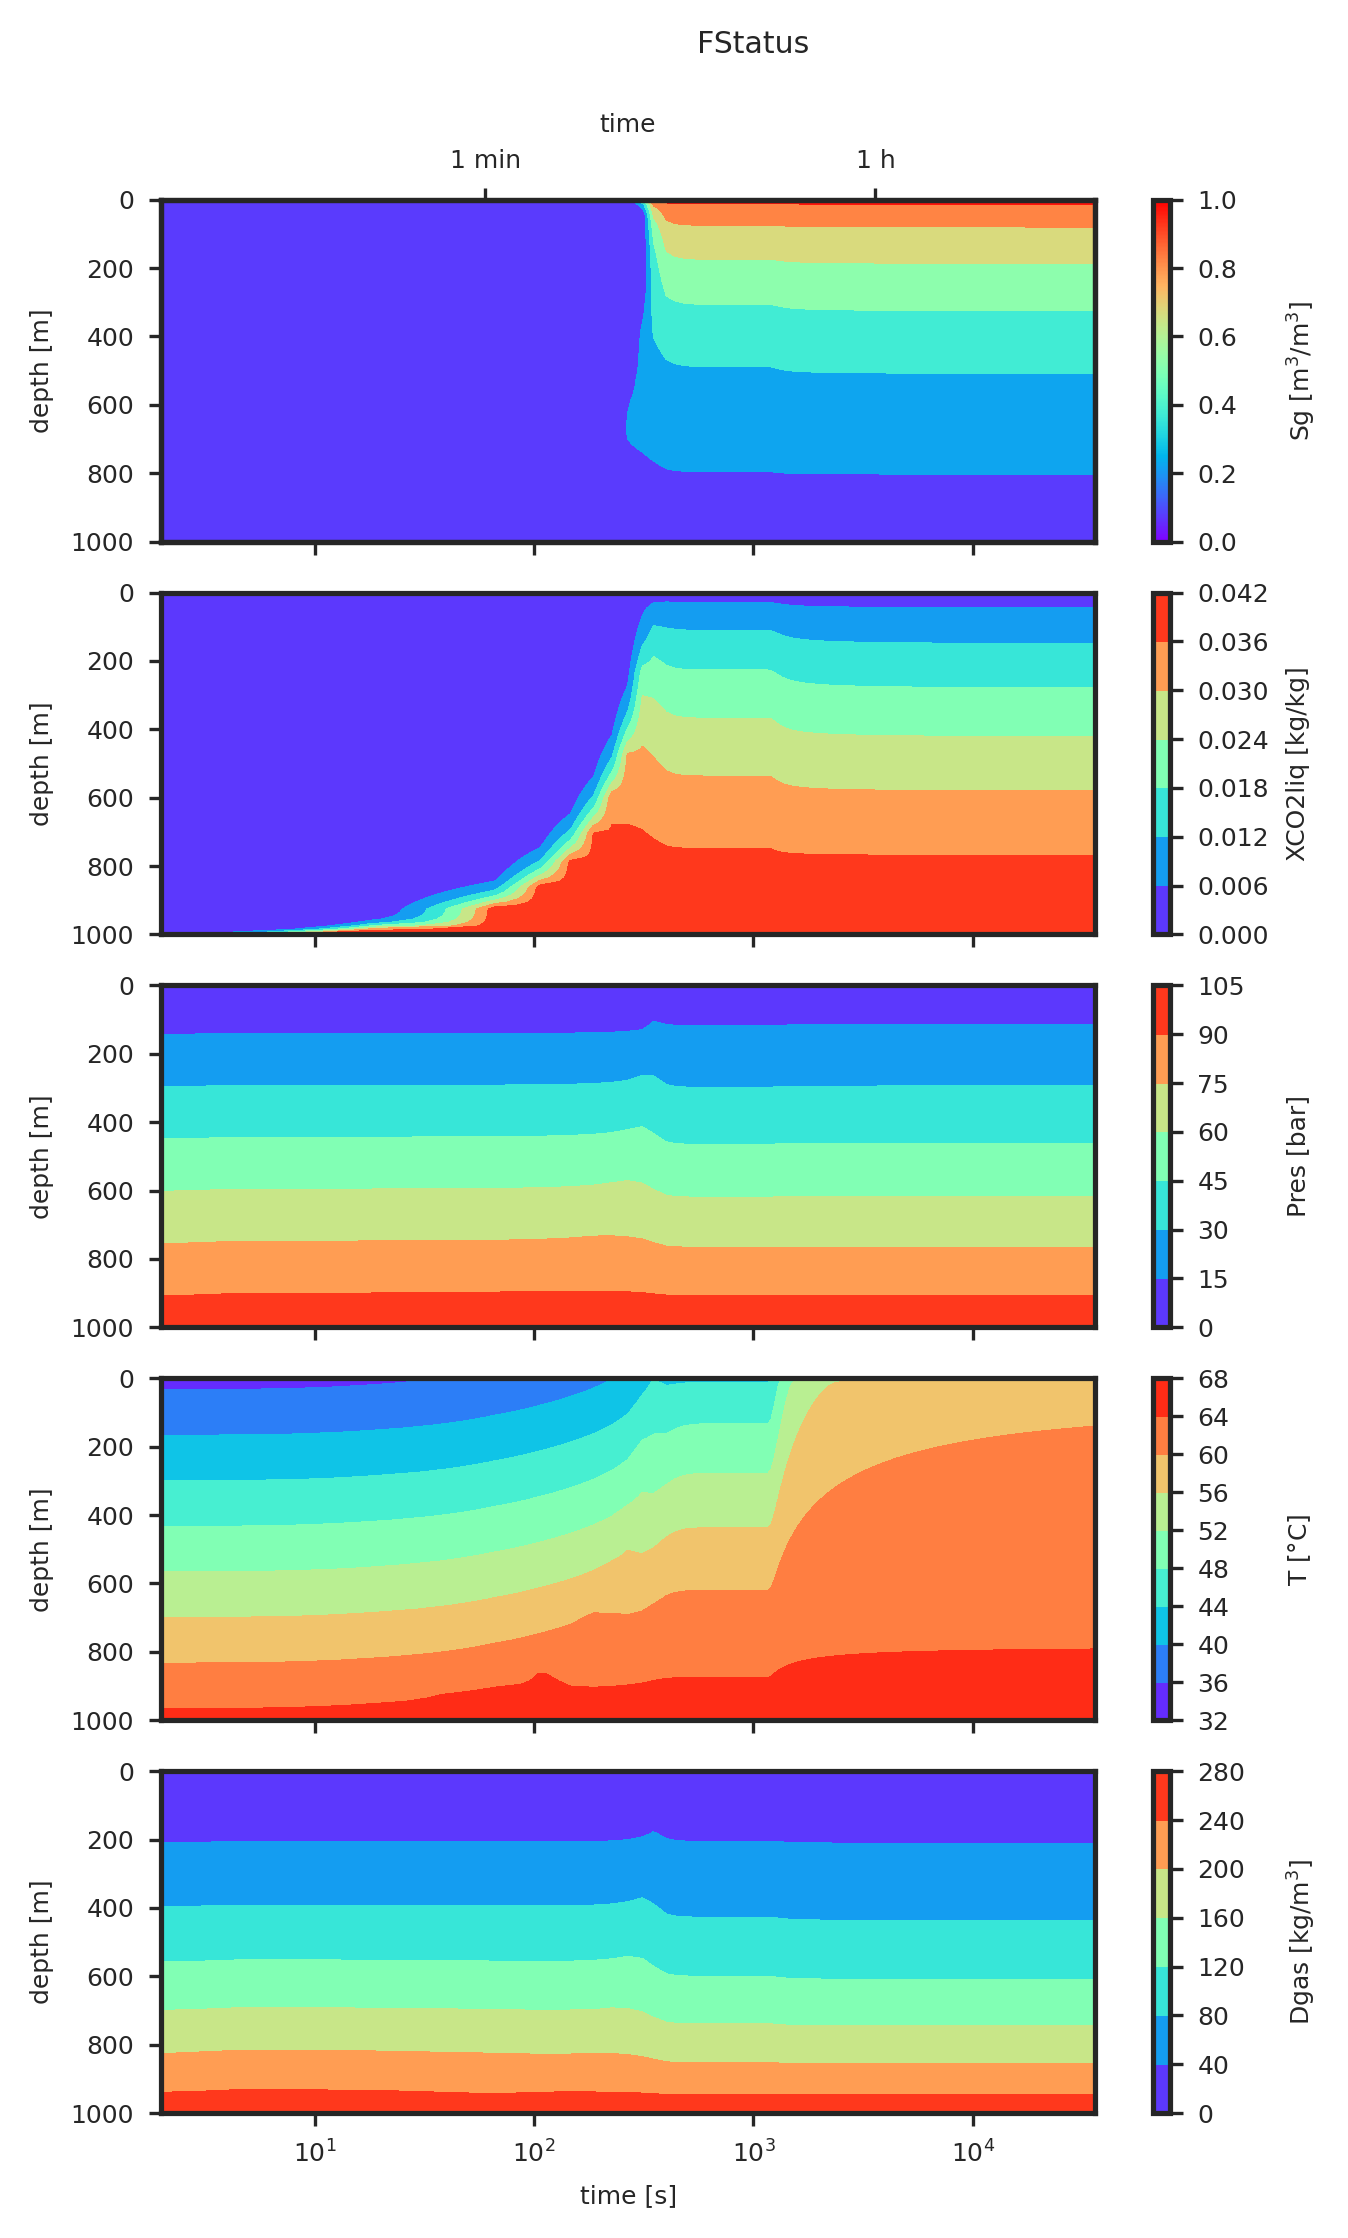

In [7]:
logscale = True

plot_Ffigure('FStatus', fstatus_df, fstatus_var, logscale)

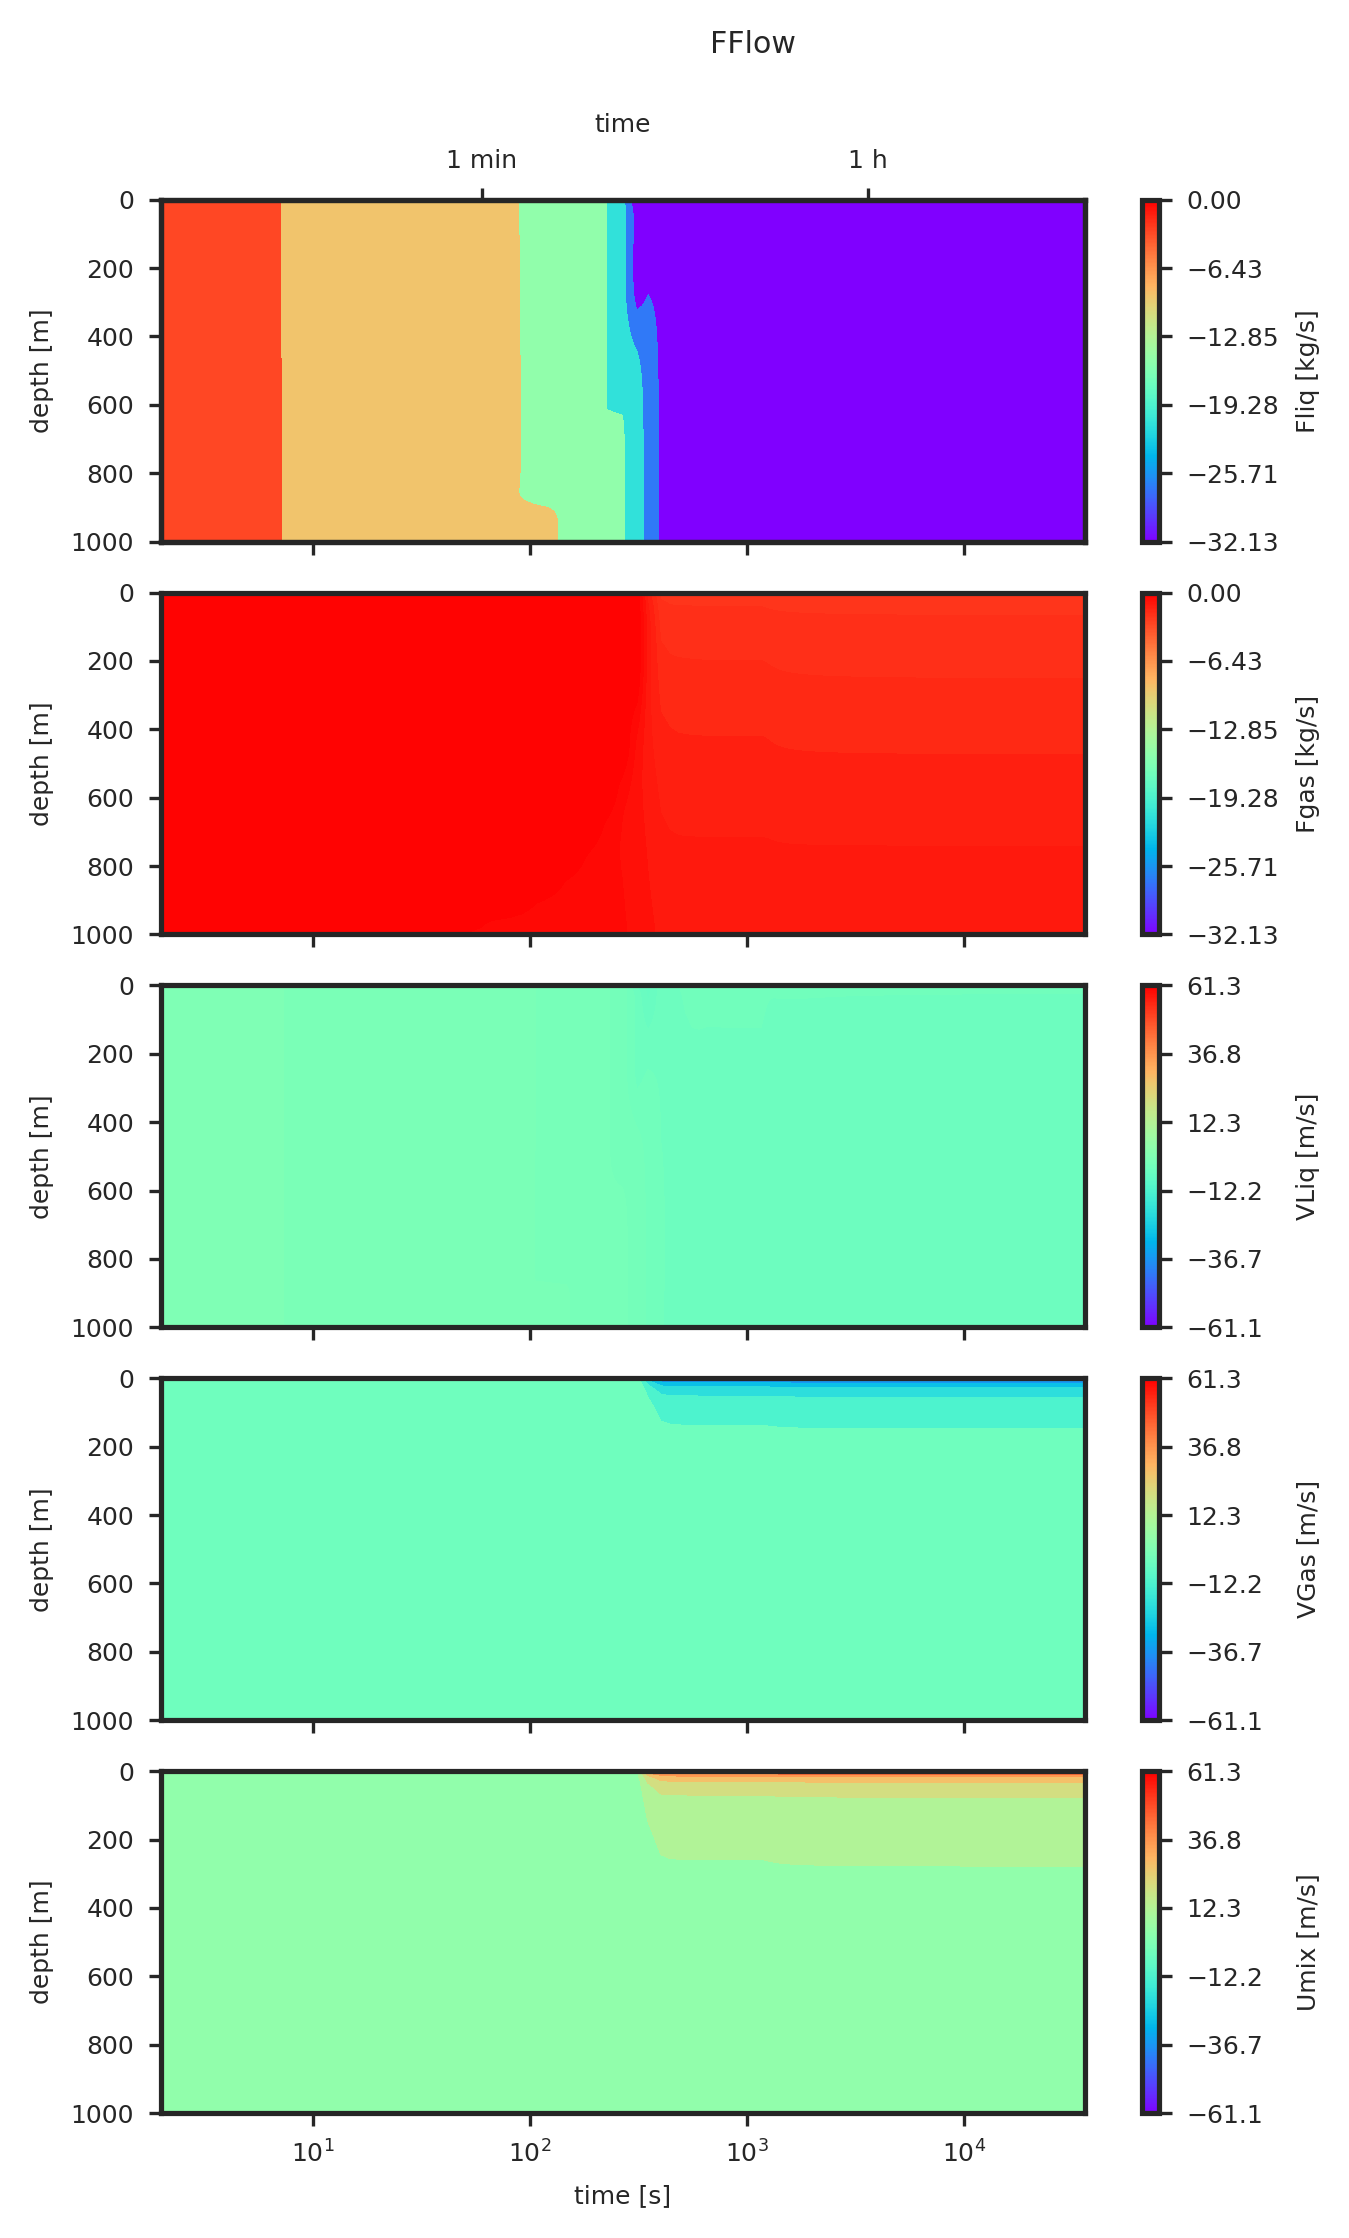

In [8]:
logscale = True

plot_Ffigure('FFlow', fflow_df, fflow_var, logscale)